# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/astronaut.png` and show it:

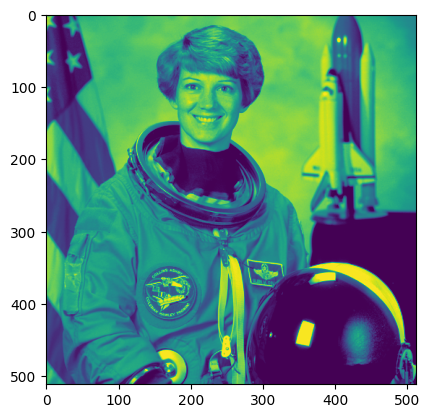

In [2]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical 3&times;3 Prewitt filters:

In [41]:
result = img.copy()
def prewitt_h(img):
    size = 3
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0]-n < 0 or p[0]+n >= img.shape[0] or p[1]-n < 0 or p[1]+n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
           y=p[0]-n+q[0]
           x=p[1]-n+q[1]
           if x < p[1]:
                neighborhood_sum = neighborhood_sum - img[y,x]
           elif x > p[1]:
                neighborhood_sum = neighborhood_sum + img[y,x]
           else:
                continue 
        h = neighborhood_sum / 6
        result[p] = h
    return result
    
def prewitt_v(img):
    size = 3
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0]-n < 0 or p[0]+n >= img.shape[0] or p[1]-n < 0 or p[1]+n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
           y=p[0]-n+q[0]
           x=p[1]-n+q[1]
           if y < p[0]:
                neighborhood_sum = neighborhood_sum - img[y,x]
           elif y > p[0]:
                neighborhood_sum = neighborhood_sum + img[y,x]
           else:
                continue 
        v = neighborhood_sum / 6
        result[p] = v
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

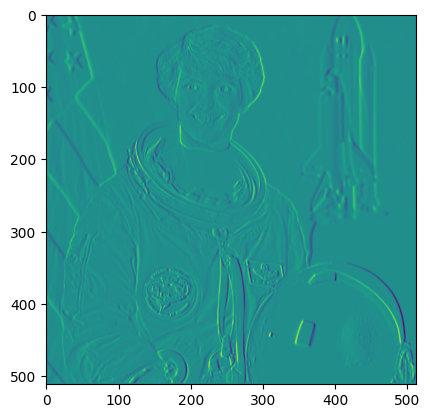

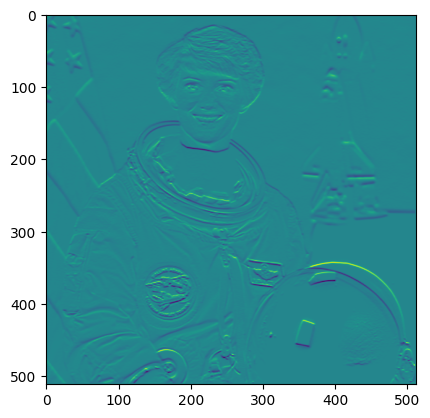

In [42]:
plt.figure()
plt.imshow(prewitt_h(img)) 

plt.figure()
plt.imshow(prewitt_v(img))


**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/astronaut_prewitt_h.tiff` and `data/astronaut_prewitt_v.tiff`:

In [43]:
import skimage.io 
img2h = prewitt_h(img)
img1h = skimage.io.imread('data/astronaut_prewitt_h.tiff')
assert numpy.allclose(img2h, img1h, atol=1/255)

img1v = skimage.io.imread('data/astronaut_prewitt_v.tiff')
img2v = prewitt_v(img)
assert numpy.allclose(img1v,img2v,atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

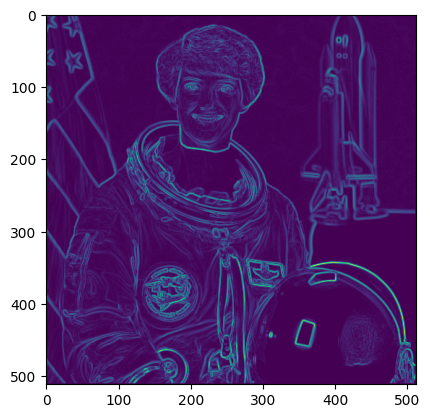

In [24]:
img2h = prewitt_h(img)
img2v = prewitt_v(img)
plt.imshow(numpy.sqrt(img2h**2 + img2v**2))

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/astronaut_prewitt_gradmag.tiff`:

In [44]:
import skimage.io 
imggm1 = (numpy.sqrt(img2h**2 + img2v**2))
imggm = skimage.io.imread('data/astronaut_prewitt_gradmag.tiff')
assert numpy.allclose(imggm1, imggm, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical 3&times;3 Sobel filtering, respectively:

In [ ]:
result = img.copy()
def sobel_h(img):
    size = 3
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0]-n < 0 or p[0]+n >= img.shape[0] or p[1]-n < 0 or p[1]+n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
           y=p[0]-n+q[0]
           x=p[1]-n+q[1]
           if x < p[1] and y == p[0]:
                neighborhood_sum = neighborhood_sum - (2*img[y,x])
           elif x < p[1] and y != p[0]:
                neighborhood_sum = neighborhood_sum - img[y,x]
           elif x > p[1] and y == p[0]:
                neighborhood_sum = neighborhood_sum + (2*img[y,x])
           elif x > p[1] and y != p[0]:
                neighborhood_sum = neighborhood_sum + img[y,x]
           else:
                continue 
        horizontal = neighborhood_sum / 8
        result[p] = horizontal
    return result
    
def sobel_v(img):
    size = 3
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        if p[0]-n < 0 or p[0]+n >= img.shape[0] or p[1]-n < 0 or p[1]+n >= img.shape[1]:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
           y=p[0]-n+q[0]
           x=p[1]-n+q[1]
           if x < p[0] and y == p[1]:
                neighborhood_sum = neighborhood_sum - (2*img[y,x])
           elif x < p[0] and y != p[1]:
                neighborhood_sum = neighborhood_sum - img[y,x]
           elif x > p[0] and y == p[1]:
                neighborhood_sum = neighborhood_sum + (2*img[y,x])
           elif x > p[0] and y != p[1]:
                neighborhood_sum = neighborhood_sum + img[y,x]
           else:
                continue 
        vertikal = = neighborhood_sum / 8
        result[p] = vertikal
    return result

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

In [ ]:
plt.figure()
plt.imshow(sobel_h(img))
plt.figure()
plt.imshow(sobel_v(img))

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/astronaut_sobel_h.tiff` and `data/astronaut_sobel_v.tiff`:

In [ ]:
import skimage.io
imgsh = skimage.io.imread('data/astronaut_sobel_h.tiff')
imgshh = sobel_h(img)
assert numpy.allclose(imgsh, imgshh, atol=1/255)
imgsv = skimage.io.imread('data/astronaut_sobel_v.tiff') 
imgsvv = sobel_v(img)
assert numpy.allclose(imgsv, imgsvv, atol=1/255)